# プログラミングを体験しよう！

## 0. プログラミングの基礎

ここではPythonというプログラミング言語を用いて、コンピュータで計算することを体験します。

- Python (https://www.python.org/)

このファイルはJupyter Notebookで扱われる形式で書かれています。文章やコード、計算結果の表示、図や動画の表示などが含まれます。

- Project Jupyter (https://jupyter.org/)

例えばここのブロックはMarkdownという形式で書くことができて、

### 見出し

や

[リンク](https://iblab.bio.nagoya-u.ac.jp)

のように修飾された文章を書くことができます。

In [1]:
## ここのブロックはコードブロックです。コードブロックでは "#" はコメントアウトです。コードとして実行されません。

In [2]:
print("Hello, world!")

## のようにコードを入力し、 "Command+Enter" または "Shift+Enter" を押すことで実行され、出力がある場合にはそのすぐ下に結果が表示されます。

Hello, world!


In [3]:
1 + 1
2 + 1

## のように計算をすると上から順番に実行され、最後の結果が表示されます。

3

In [4]:
x = 2 + 1

## 計算結果を変数に格納することができます。

print(x)

3


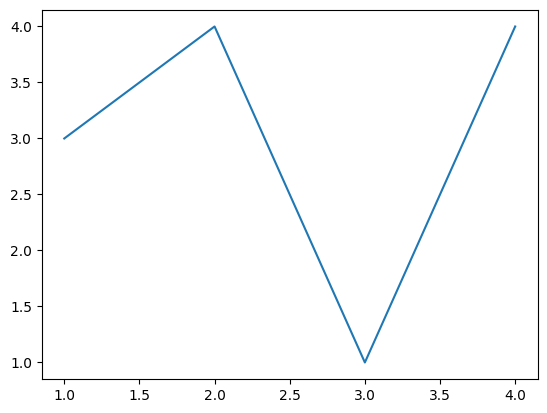

In [5]:
## グラフが表示されます。

import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [3, 4, 1, 4])
plt.show()

---
## 1. データを処理して図を作る

ここでは厚生労働省が公開しているCOVID-19の感染者数のデータを可視化してみましょう。

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [7]:
## データの読み込み
data_load = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv")

In [8]:
## 読み込んだデータ
data_load

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2023/5/4,7303,474,48,53,188,35,63,107,249,...,21,10,189,28,38,56,80,54,63,150
1205,2023/5/5,5793,354,74,61,105,36,56,74,76,...,65,18,207,19,48,70,60,23,68,172
1206,2023/5/6,6257,446,61,84,154,38,79,116,69,...,24,9,202,33,48,68,70,38,29,125
1207,2023/5/7,14344,658,127,116,293,133,117,188,106,...,105,40,687,87,114,133,121,95,168,254


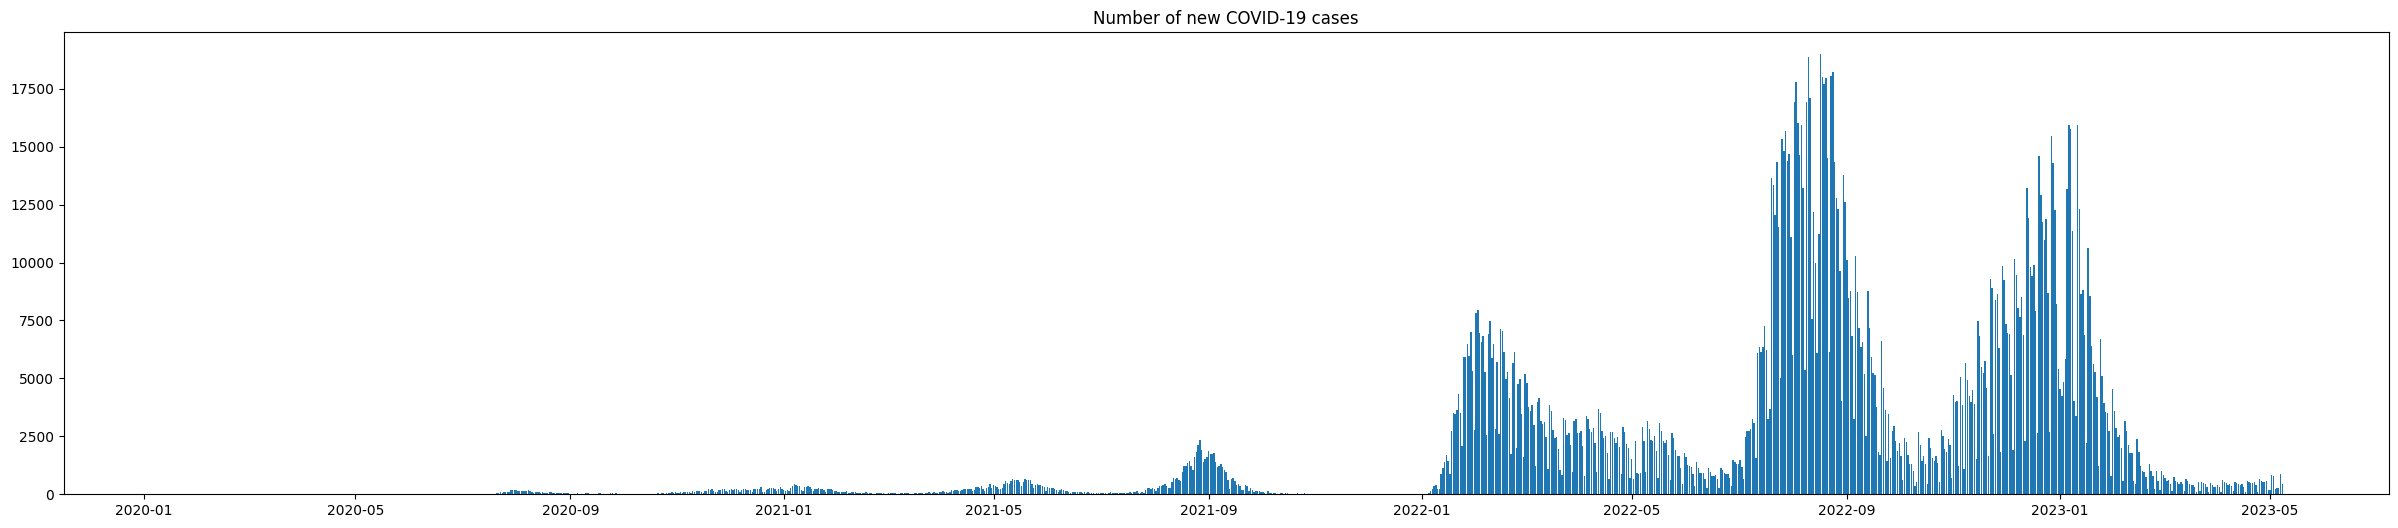

In [9]:
## 全期間のプロット

place_plot = "Aichi"

plt.figure(figsize=(30,6))
plt.bar(pd.to_datetime(data_load['Date']), data_load[place_plot])
plt.title('Number of new COVID-19 cases')
plt.show()

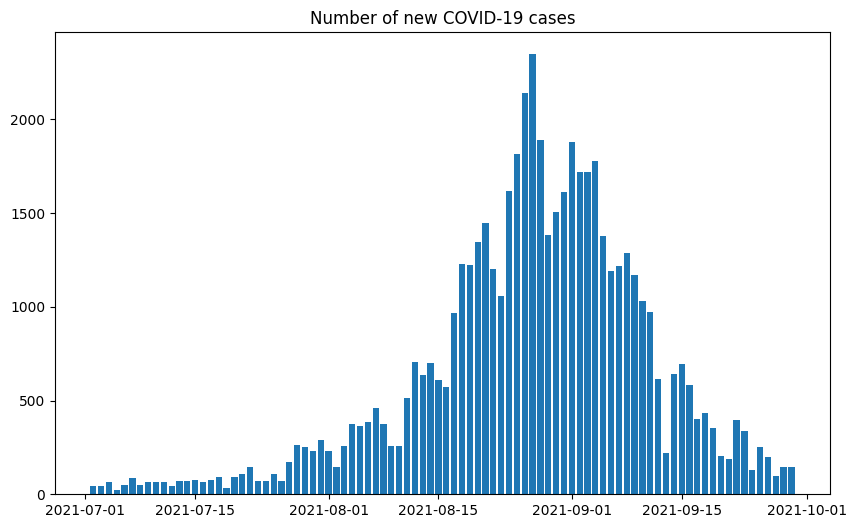

In [10]:
place_plot = "Aichi" #県名
time_start = datetime.datetime(2021,7,1) #最初の日
time_end = datetime.datetime(2021,9,30) #最後の日

data_load['Date'] = pd.to_datetime(data_load['Date'], format = "%Y/%m/%d")
data_infected = data_load[['Date', place_plot]]
data_infected_selected = data_infected.query('@time_start < Date < @time_end') # 期間

plt.figure(figsize=(10,6))
plt.bar(pd.to_datetime(data_infected_selected['Date']), data_infected_selected['Aichi'])
plt.title('Number of new COVID-19 cases')
plt.show()

### ＜課題１＞

都道府県やプロットする最初の日と最後の日を変えてデータをプロットしてみましょう。

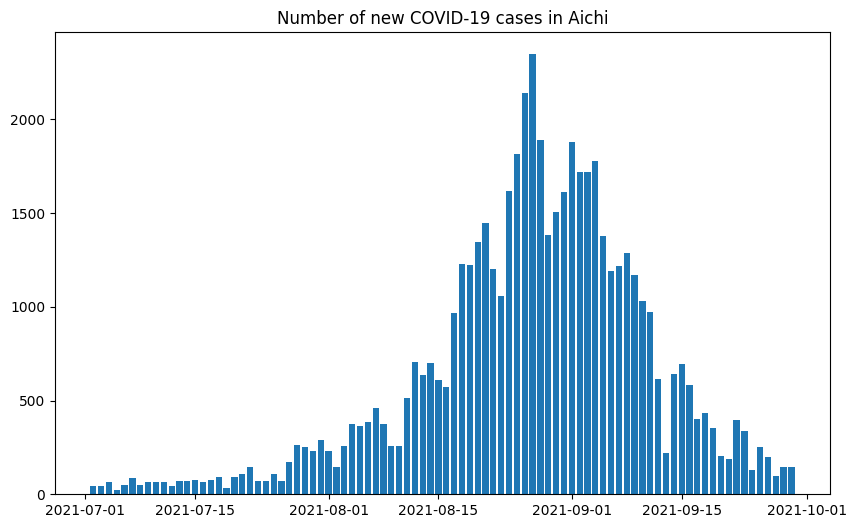

In [16]:
place_plot = "Aichi" #県名
time_start = datetime.datetime(2021,7,1) #最初の日
time_end = datetime.datetime(2021,9,30) #最後の日

data_load['Date'] = pd.to_datetime(data_load['Date'], format = "%Y/%m/%d")
data_infected = data_load[['Date', place_plot]]
data_infected_selected = data_infected.query('@time_start < Date < @time_end') # 期間

plt.figure(figsize=(10,6))
plt.bar(pd.to_datetime(data_infected_selected['Date']), data_infected_selected[place_plot])
plt.title('Number of new COVID-19 cases in ' + str(place_plot))
plt.show()

---
## 2. 繰り返し計算する

ここでは、プログラミングでコンピュータに命令を出すことで計算する利点の１つである、繰り返し計算について体験しましょう。

正の整数を1から$N_{\text{max}}$まで足し合わせることを考えます。つまり

$$
\sum_{i=1}^{N_{\text{max}}}{i} = \frac{(N_{\text{max}} + 1)N_{\text{max}}}{2}
$$

を計算します。1から順番に$N_{\text{max}}$までを足していくと同じ結果が得られます。

In [17]:
def sum_natural(arg_N_max):
    res = 0
    for i in range(arg_N_max + 1):
        res += i
    
    return(res)

In [18]:
N_max = 4
print("1から" + str(N_max) + "までの整数の和は" + str(((N_max + 1)*N_max)/2) + ", 繰り返し計算の結果は" + str(sum_natural(N_max)))

1から4までの整数の和は10.0, 繰り返し計算の結果は10


### ＜課題２＞

最大の数 `N_max` を変えて計算結果を確認しましょう。

In [22]:
N_max = 4
print("1から" + str(N_max) + "までの整数の和は" + str(((N_max + 1)*N_max)/2) + ", 繰り返し計算の結果は" + str(sum_natural(N_max)))

1から4までの整数の和は10.0, 繰り返し計算の結果は10


---
## 3. 決まった手続き（アルゴリズム）に従って計算する

ここでは、数直線上で動く点を考えます。0から始まり、ある確率$p$で負の方向に１に移動し、確率$1-p$で正の方向に移動します。

確率的に動いていくので、$N_{\text{iter}}$回移動した後の軌跡は毎回異なります。

In [23]:
import random

In [24]:
def random_walk(arg_p_left, arg_N_sim, arg_N_iter):
    pos_all = [[x + 1 for x in range(arg_N_iter)]]
    
    fig = plt.figure(figsize = (15, 4))
    ax = fig.add_subplot(1, 2, 1)
    
    for i in range(arg_N_sim):
        
        pos_temp = 0
        pos_sim = []
        
        for j in range(arg_N_iter):
            if random.random() < arg_p_left:
                pos_temp -= 1
            else:
                pos_temp += 1
            
            pos_sim.append(pos_temp)
        
        pos_all.append(pos_sim)
        
        ax.plot(pos_all[0], pos_all[i + 1])
        
    pos_end = [pos_all[x + 1][arg_N_iter - 1] for x in range(arg_N_sim - 1)]
    
    ax = fig.add_subplot(1, 2, 2)
    binwidth = 4
    ax.hist(pos_end, bins=range(min(pos_end), max(pos_end) + binwidth, binwidth))
    
    fig.tight_layout()
    fig.show()

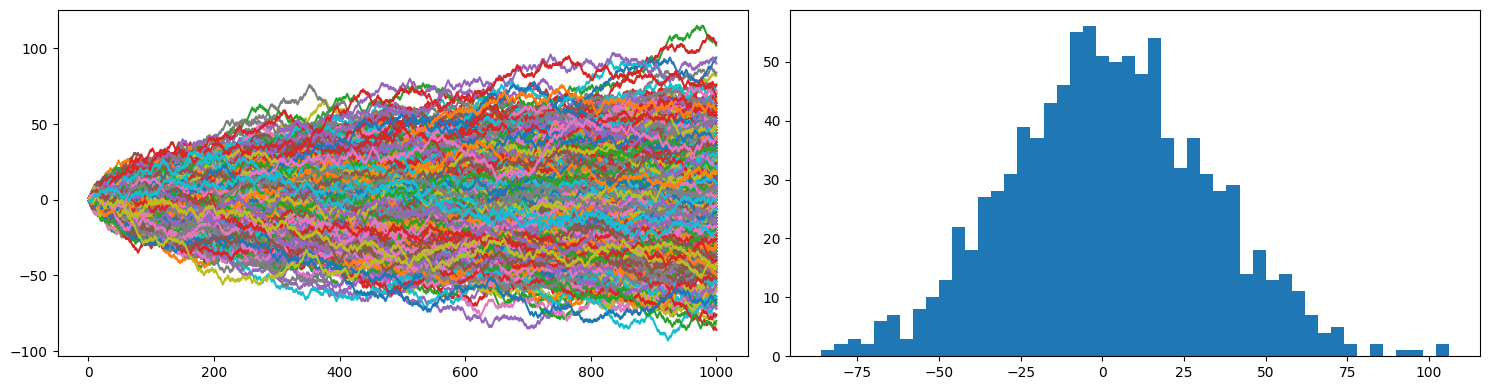

In [25]:
random.seed(1)

p_left = 0.5 # 1下がる確率
N_sim = 1000 # シミュレーションの回数
N_iter = 1000 # 位置を移動する回数
random_walk(p_left, N_sim, N_iter)

### ＜課題３＞

左への行きやすさ `rate_left` を変えて結果がどう変わるかを観察してみましょう。

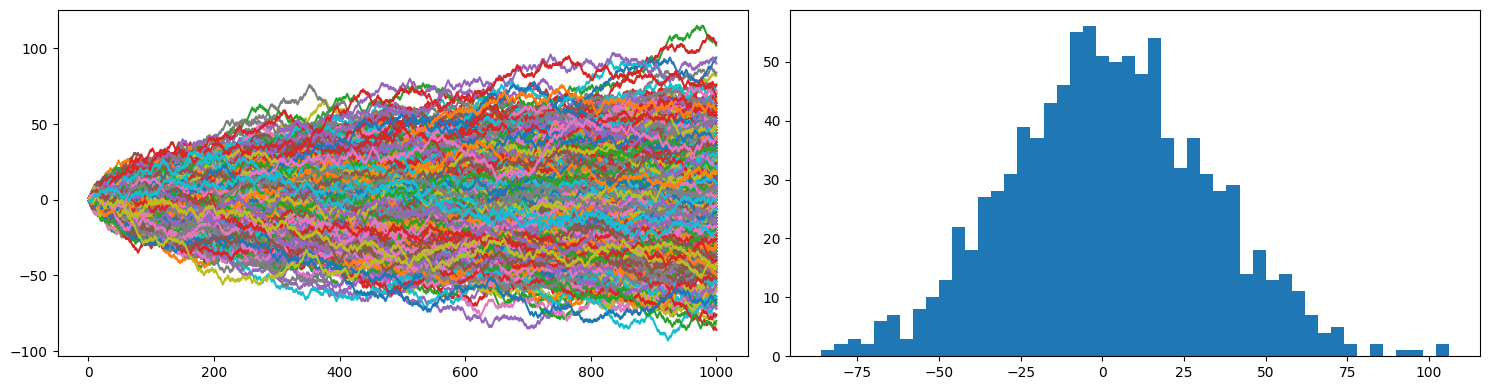

In [31]:
random.seed(1)

p_left = 0.5 # 1下がる確率
N_sim = 1000 # シミュレーションの回数
N_iter = 1000 # 位置を移動する回数
random_walk(p_left, N_sim, N_iter)

---
## 4. データに合う数理モデルのパラメータを探す

ここでは、COVID-19の新規感染者数と感染症の流行過程を表すモデルが重なるようなパラメータの組み合わせを探してみましょう。

SIR model:

感染症の流行過程を記述するモデル  

$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

変数:  

$S(t)$: 感受性保持者（susceptible）  
$I(t)$: 感染性保持者（Infectious）  
$R(t)$: 回復者（Recovered） or 隔離者（Removed）  

パラメータ:

$\beta$: 感染性（感染力）  
$\gamma$: 回復率  
$S(0)$: 感受性保持者の初期値（最初の時刻の時の値） 


In [32]:
def calculate_SIR(beta, gamma, x0, y0, z0, time_start, time_end):

    dt = 0.01
    t = 0
    x = x0
    y = y0
    z = z0
    xList = [x]
    yList = [y]
    zList = [z]
    tList = [t]
    newinfList = [beta*x*y]
    
    i_temp = 0
    while t < (time_end - time_start).days:
        i_temp += 1
        t = dt*(i_temp)

        xx = x + dt*(-beta*x*y)
        yy = y + dt*(beta*x*y-gamma*y)
        zz = z + dt*(gamma*y)

        x = xx
        y=yy
        z=zz
        tList.append(t)
        xList.append(x)
        yList.append(y)
        zList.append(z)
        newinfList.append(beta*x*y)

    return [tList, xList, yList, zList, newinfList]

def plot_SIR(beta, gamma, x0, y0, z0, time_start, time_end, data_plot_x, data_plot_y):
    
    out_sir = calculate_SIR(beta, gamma, x0, y0, z0, time_start, time_end)
    
    tList = out_sir[0]
    newinfList = out_sir[4]

    tList_cal = [time_start + datetime.timedelta(days = i) for i in tList]
    
    plt.figure(figsize=(10,6))
    
    plt.bar(pd.to_datetime(data_plot_x), data_plot_y)
    plt.plot(tList_cal, newinfList, color="#ff0000")
    plt.title('Number of new COVID-19 cases')

    plt.show()
    


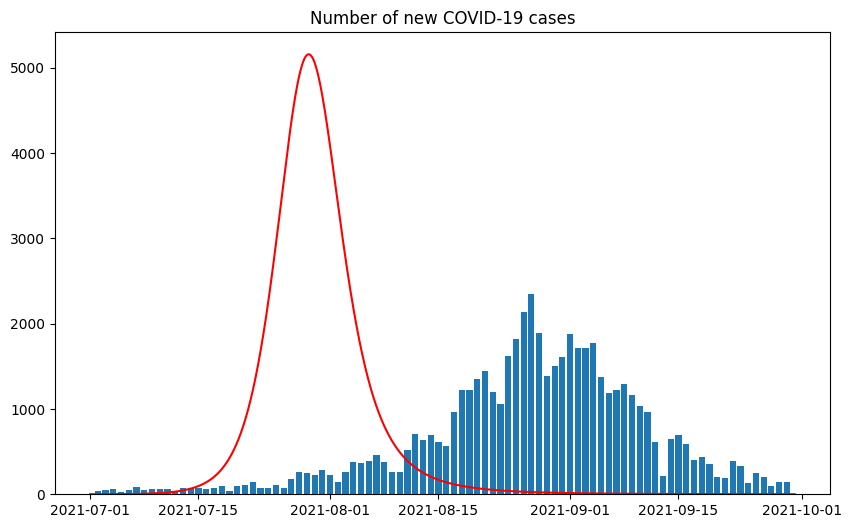

In [33]:
p_beta = 0.000008
p_gamma = 0.1
p_s0 = 60000

place_plot = "Aichi" #県名
time_start = datetime.datetime(2021,7,1) #最初の日
time_end = datetime.datetime(2021,9,30) #最後の日

data_load['Date'] = pd.to_datetime(data_load['Date'], format = "%Y/%m/%d")
data_infected = data_load[['Date', place_plot]]
data_infected_selected = data_infected.query('@time_start < Date < @time_end')

data_plot_x = data_infected_selected['Date']
data_plot_y = data_infected_selected[place_plot]

plot_SIR(beta = p_beta, gamma = p_gamma, x0 = p_s0, y0 = 1, z0 = 0, time_start = time_start, time_end = time_end, data_plot_x = data_plot_x, data_plot_y = data_plot_y)

### ＜課題４＞

感染症の広がりを表す数理モデルのパラメータ２つ、感染率 `p_beta` （$\beta$）、回復率 `p_delta` （$\delta$） と、最初の未感染の人口 `p_s0`　（$S(0)$）を変えて、愛知県の感染者数の変化に合う組み合わせを探してみましょう。

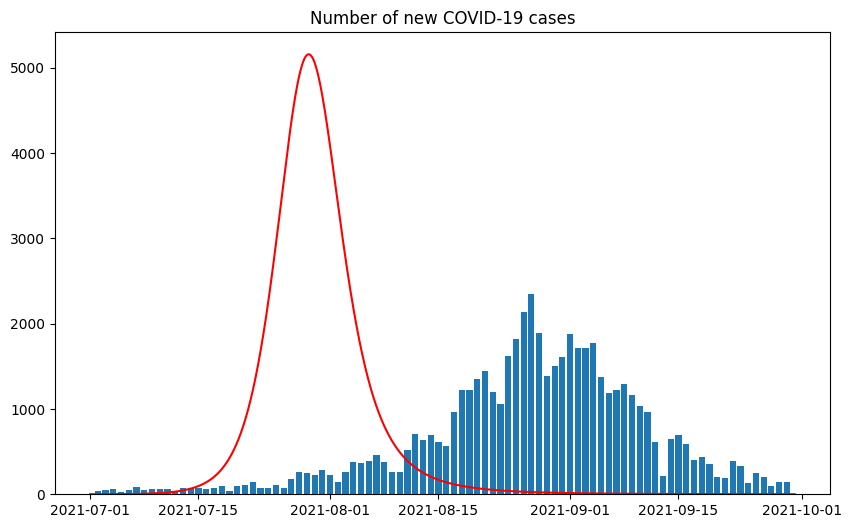

In [36]:
p_beta = 0.000008
p_gamma = 0.1
p_s0 = 60000

place_plot = "Aichi" #県名
time_start = datetime.datetime(2021,7,1) #最初の日
time_end = datetime.datetime(2021,9,30) #最後の日

data_load['Date'] = pd.to_datetime(data_load['Date'], format = "%Y/%m/%d")
data_infected = data_load[['Date', place_plot]]
data_infected_selected = data_infected.query('@time_start < Date < @time_end')

data_plot_x = data_infected_selected['Date']
data_plot_y = data_infected_selected[place_plot]

plot_SIR(beta = p_beta, gamma = p_gamma, x0 = p_s0, y0 = 1, z0 = 0, time_start = time_start, time_end = time_end, data_plot_x = data_plot_x, data_plot_y = data_plot_y)

---
このコードに関する連絡は岩波まで  
https://iwanami.me